In [1]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt

Nmax = 3000

In [2]:
def caminha(state, matriz):
    nextstate = state
    rand = np.random.uniform()
    
    aux = 0
    for i in range(5):
        aux = aux + matriz[state][i]
        if(matriz[state][i]!=0):
            if(rand<aux):
                nextstate = i
                break
            else:
                continue
    return nextstate

In [3]:
def simula(p, Nmax):
    vp = [] # lista que armazena a fração de ocorrências em função do número de simulações nsim
    vsim = [] # numero de simulações
    vsteps = []
    vescape = {'step':[],'nsim':[]}
    vmorto = {'step':[],'nsim':[]}
    vdois = []
    vquatro = []


    for nsim in np.arange(10, Nmax, 10):
        ok = 0 # armazena o número de fuga (i.e. absorção no estado 5)
        ndois = 0
        nquatro = 0
        step = 0
        escape = 0
        morto = 0
        for i in range(1,nsim):
            state = 0
            aux = 0
            while(True):
                state = caminha(state, p)
                step = step + 1
                aux = aux + 1

                if state  == 1:
                    ndois = ndois + 1

                elif state == 3:
                    nquatro = nquatro +1

                elif (state == 2 and p[2][2]==1):
                    morto = morto + aux
                    break

                elif state == 4:
                    ok = ok + 1
                    escape = escape + aux 
                    break


        vp.append(ok/nsim)
        vsim.append(nsim)

        vdois.append(ndois/nsim)
        vquatro.append(nquatro/nsim)

        vsteps.append(step/nsim)  

        vmorto['step'].append(morto/(nsim-ok))
        vmorto['nsim'].append(nsim)
        if(ok != 0):
            vescape['step'].append(escape/ok)
            vescape['nsim'].append(nsim)
    return {'vp':vp,'vsim':vsim,'vdois':vdois,'vquatro':vquatro,'vsteps':vsteps,'vmorto':vmorto,'vescape':vescape}

# Grafo 1: sem transição entre mesmo estado

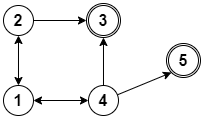

### Matriz Markoviana:
Para esta configuração, podemos estabelecer a seguinte matriz markoviana: 

<br>
$$
\begin{equation}    
    \label{matriz1}
    \begin{bmatrix}
        0 & 0.5 & 0 & 0.5 & 0\\
        0.5 & 0 & 0.5 & 0 & 0\\
        0 & 0 & 1 & 0 & 0\\
        0.333 & 0 & 0.333 & 0 & 0.333\\
        0 & 0 & 0 & 0 & 1
    \end{bmatrix}  
\end{equation}
$$

In [4]:
p = np.array([[0,1/2,0,1/2,0],
              [1/2,0,1/2,0,0],
              [0,0,1,0,0],
              [1/3,0,1/3,0,1/3],
              [0,0,0,0,1]])
ret = simula(p,Nmax)


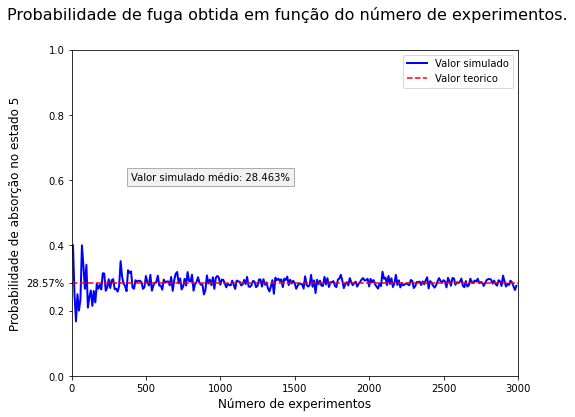

In [5]:
plt.figure(figsize = (8,6))
plt.plot(ret['vsim'],ret['vp'], linestyle = '-', color='blue', linewidth =2, label = 'Valor simulado')
plt.axhline(y=2/7, color='r', linestyle ='--', label = 'Valor teorico')
plt.ylabel("Probabilidade de absorção no estado 5", fontsize=12)
plt.xlabel("Número de experimentos", fontsize = 12)
plt.suptitle("Probabilidade de fuga obtida em função do número de experimentos.", fontsize = 16)
plt.xlim(0.0,Nmax)
plt.ylim(0.0,1.0)
plt.text(400,0.6,"Valor simulado médio: "+"{:.3%}".format(np.mean(ret['vp'])), bbox=dict(facecolor='lightgrey', alpha=0.3))
plt.legend()
locs, labels = plt.yticks()  # Get the current locations and labels.
plt.yticks(np.arange(0, 1, step=0.2))  # Set label locations.
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0,2/7],[0.0,0.2,0.4,0.6,0.8,1.0,"{:.2%}".format(2/7)])

plt.show(True)

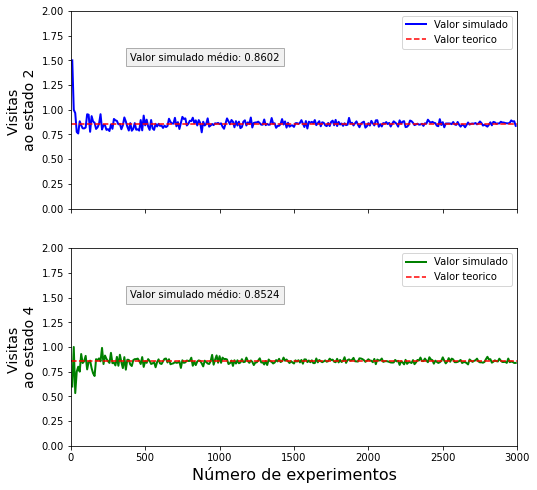

In [6]:
fig, axs = plt.subplots(2, sharex=True,figsize=(8, 8))
#fig.suptitle('Número médio de visitas ao estado 2 e 4', fontsize = 15)

axs[0].plot(ret['vsim'],ret['vdois'], linestyle = '-', color='blue', linewidth =2, label = 'Valor simulado')
axs[1].plot(ret['vsim'],ret['vquatro'], linestyle = '-', color='green', linewidth =2, label = 'Valor simulado')


states = [2,4]
axs[0].text(400,1.5,"Valor simulado médio: "+"{:.4f}".format(np.mean(ret['vdois'])), bbox=dict(facecolor='lightgrey', alpha=0.3))
axs[1].text(400,1.5,"Valor simulado médio: "+"{:.4f}".format(np.mean(ret['vquatro'])), bbox=dict(facecolor='lightgrey', alpha=0.3))
c = 0
for ax in axs.flat:
    ax.axhline(y=6/7, color='r', linestyle ='--', label = 'Valor teorico')
    ax.set(ylabel=f"Visitas \nao estado {states[c]}",xlabel="Número de experimentos", xlim = (0.0,Nmax),ylim=(0.0,2))
    ax.legend()
    c = c +1
    ax.yaxis.label.set(fontsize=14)
    ax.xaxis.label.set(fontsize=16)
    

for ax in axs.flat:
    ax.label_outer()


plt.show(True)

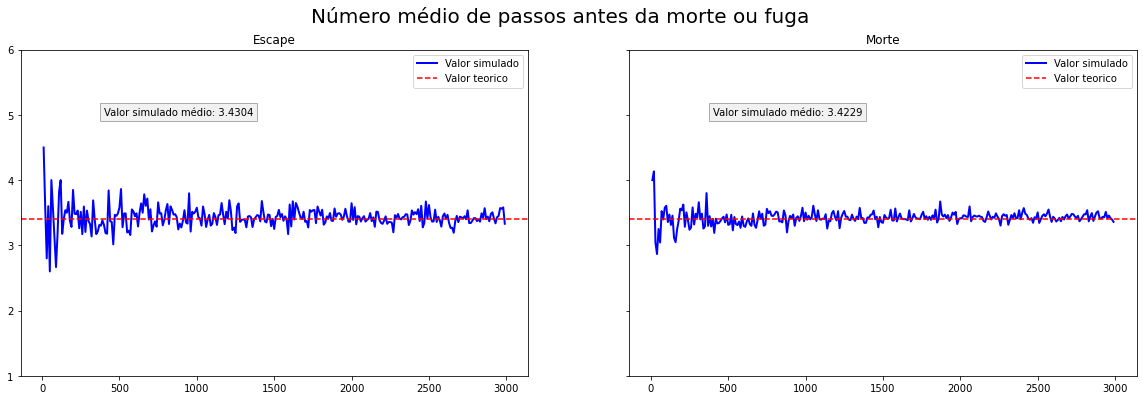

In [7]:
fig, (ax1,ax2) = plt.subplots(1,2, sharey=True,figsize=(20, 6))
fig.suptitle('Número médio de passos antes da morte ou fuga', fontsize = 20)

ax1.plot(ret['vescape']['nsim'],ret['vescape']['step'], linestyle = '-', color='blue', linewidth =2, label = 'Valor simulado')
ax2.plot(ret['vmorto']['nsim'],ret['vmorto']['step'], linestyle = '-', color='blue', linewidth =2, label = 'Valor simulado')

ax1.text(400,5,"Valor simulado médio: "+"{:.4f}".format(np.mean(ret['vescape']['step'])), bbox=dict(facecolor='lightgrey', alpha=0.3))
ax2.text(400,5,"Valor simulado médio: "+"{:.4f}".format(np.mean(ret['vmorto']['step'])), bbox=dict(facecolor='lightgrey', alpha=0.3))

ax1.set_title("Escape")
ax2.set_title("Morte")

for ax in [ax1,ax2]:
    ax.axhline(y=3.4, color='r', linestyle ='--', label = 'Valor teorico')
    ax.legend()
    ax.yaxis.label.set(fontsize=14)
    ax.xaxis.label.set(fontsize=16)
    ax.set(ylim=(1.0,6))
    

for ax in axs.flat:
    ax.label_outer()


plt.show(True)

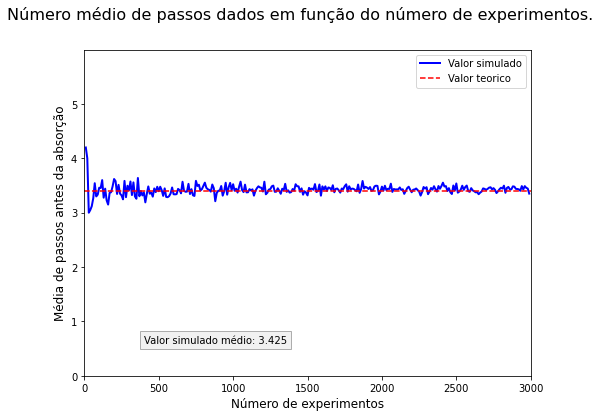

In [8]:
plt.figure(figsize = (8,6))
plt.plot(ret['vsim'],ret['vsteps'], linestyle = '-', color='blue', linewidth =2, label = 'Valor simulado')
plt.axhline(y=3.4, color='r', linestyle ='--', label = 'Valor teorico')
plt.ylabel("Média de passos antes da absorção", fontsize=12)
plt.xlabel("Número de experimentos", fontsize = 12)
plt.suptitle("Número médio de passos dados em função do número de experimentos.", fontsize = 16)
plt.xlim(0.0,Nmax)
plt.ylim(0.0,6)
plt.text(400,0.6,"Valor simulado médio: "+"{:.3f}".format(np.mean(ret['vsteps'])), bbox=dict(facecolor='lightgrey', alpha=0.3))
plt.legend()
locs, labels = plt.yticks()  # Get the current locations and labels.
plt.yticks(np.arange(0, 6, step=1))  # Set label locations.


plt.show(True)

## Sem a aranha:
Considerando que a aranha não está no estado 3, ficamos com uma nova matriz markoviana, dada por:


$$
\begin{equation}    
    \label{matriz1}
    \begin{bmatrix}
        0 & 0.5 & 0 & 0.5 & 0\\
        0.5 & 0 & 0.5 & 0 & 0\\
        0 & 0.5 & 0 & 0.5 & 0\\
        0.333 & 0 & 0.333 & 0 & 0.333\\
        0 & 0 & 0 & 0 & 1
    \end{bmatrix}  
\end{equation}
$$

Refazendo a simulação para esta nova matriz, olhando o número de passos dados, temos:

In [9]:
p = np.array([[0,1/2,0,1/2,0],
              [1/2,0,1/2,0,0],
              [0,1/2,0,1/2,0],
              [1/3,0,1/3,0,1/3],
              [0,0,0,0,1]])

ret1 = simula(p,Nmax)

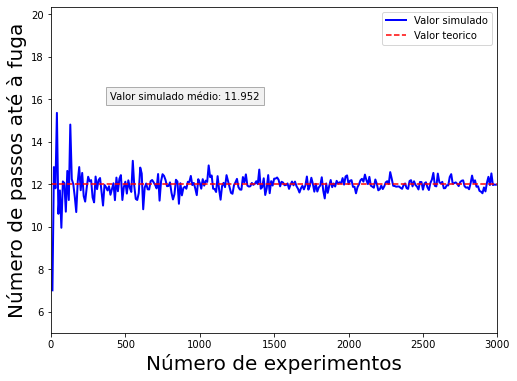

In [10]:

plt.figure(figsize = (8,6))
plt.plot(ret1['vsim'],ret1['vsteps'], linestyle = '-', color='blue', linewidth =2, label = 'Valor simulado')
plt.axhline(y=12, color='r', linestyle ='--', label = 'Valor teorico')
plt.ylabel("Número de passos até à fuga", fontsize=20)
plt.xlabel("Número de experimentos", fontsize = 20)
plt.text(400,16,"Valor simulado médio: "+"{:.3f}".format(np.mean(ret1['vsteps'])), bbox=dict(facecolor='lightgrey', alpha=0.3))
plt.xlim(0.0,Nmax)
plt.ylim(5.0,np.amax(ret1['vsteps']) + 5)
plt.legend()
plt.show(True)


# Grafo 2: com transição entre mesmo estado

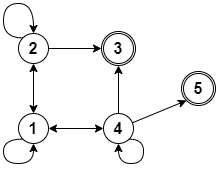

### Matriz Markoviana:
Para esta configuração, podemos estabelecer a seguinte matriz markoviana: 

<br>
então a seguinte matriz de transição de estados:
$$
\begin{equation}
    \label{matriz2}
    \begin{bmatrix}
        0.333 & 0.333 & 0 & 0.333 & 0\\
        0.333 & 0.333 & 0.333 & 0 & 0\\
        0 & 0 & 1 & 0 & 0\\
        0.25 & 0 & 0.25 & 0.25 & 0.25\\
        0 & 0 & 0 & 0 & 1
    \end{bmatrix}  
\end{equation}
$$

In [11]:
p = np.array([[1/3, 1/3, 0,   1/3, 0],
              [1/3, 1/3, 1/3, 0,   0],
              [0,   0, 1, 0, 0],
              [1/4, 0,   1/4, 1/4, 1/4],
              [0,   0,   0,   0,   1]])

ret2 = simula(p,Nmax)

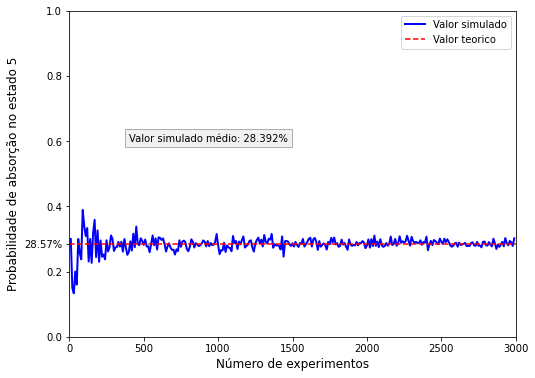

In [12]:
plt.figure(figsize = (8,6))
plt.plot(ret2['vsim'],ret2['vp'], linestyle = '-', color='blue', linewidth =2, label = 'Valor simulado')
plt.axhline(y=2/7, color='r', linestyle ='--', label = 'Valor teorico')
plt.ylabel("Probabilidade de absorção no estado 5", fontsize=12)
plt.xlabel("Número de experimentos", fontsize = 12)
#plt.suptitle("Probabilidade de fuga obtida em função do número de experimentos.", fontsize = 16)
plt.xlim(0.0,Nmax)
plt.ylim(0.0,1.0)
plt.text(400,0.6,"Valor simulado médio: "+"{:.3%}".format(np.mean(ret2['vp'])), bbox=dict(facecolor='lightgrey', alpha=0.3))
plt.legend()
locs, labels = plt.yticks()  # Get the current locations and labels.
plt.yticks(np.arange(0, 1, step=0.2))  # Set label locations.
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0,2/7],[0.0,0.2,0.4,0.6,0.8,1.0,"{:.2%}".format(2/7)])

plt.show(True)

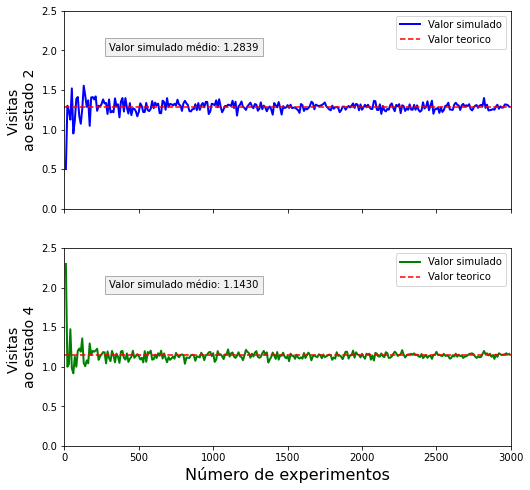

In [13]:
fig, axs = plt.subplots(2, sharex=True,figsize=(8, 8))
#fig.suptitle('Número médio de visitas ao estado 2 e 4', fontsize = 15)

axs[0].plot(ret2['vsim'],ret2['vdois'], linestyle = '-', color='blue', linewidth =2, label = 'Valor simulado')
axs[1].plot(ret2['vsim'],ret2['vquatro'], linestyle = '-', color='green', linewidth =2, label = 'Valor simulado')

axs[0].axhline(y=9/7, color='r', linestyle ='--', label = 'Valor teorico')
axs[1].axhline(y=8/7, color='r', linestyle ='--', label = 'Valor teorico')

states = [2,4]
axs[0].text(300,2,"Valor simulado médio: "+"{:.4f}".format(np.mean(ret2['vdois'])), bbox=dict(facecolor='lightgrey', alpha=0.3))
axs[1].text(300,2,"Valor simulado médio: "+"{:.4f}".format(np.mean(ret2['vquatro'])), bbox=dict(facecolor='lightgrey', alpha=0.3))
c = 0
for ax in axs.flat:
    ax.set(ylabel=f"Visitas \nao estado {states[c]}",xlabel="Número de experimentos", xlim = (0.0,Nmax),ylim=(0.0,2.5))
    ax.legend()
    c = c +1
    ax.yaxis.label.set(fontsize=14)
    ax.xaxis.label.set(fontsize=16)
    

for ax in axs.flat:
    ax.label_outer()


plt.show(True)

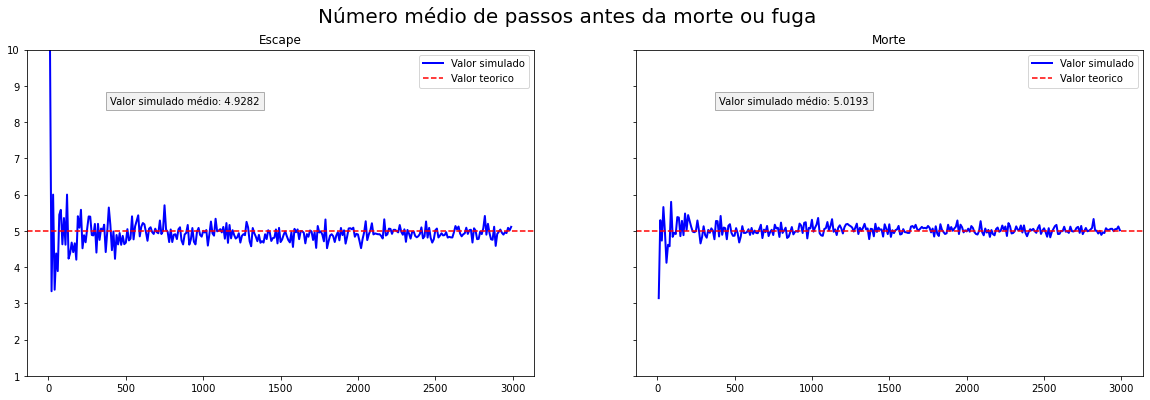

In [14]:
fig, (ax1,ax2) = plt.subplots(1,2, sharey=True,figsize=(20, 6))
fig.suptitle('Número médio de passos antes da morte ou fuga', fontsize = 20)

ax1.plot(ret2['vescape']['nsim'],ret2['vescape']['step'], linestyle = '-', color='blue', linewidth =2, label = 'Valor simulado')
ax2.plot(ret2['vmorto']['nsim'],ret2['vmorto']['step'], linestyle = '-', color='blue', linewidth =2, label = 'Valor simulado')

ax1.text(400,8.5,"Valor simulado médio: "+"{:.4f}".format(np.mean(ret2['vescape']['step'])), bbox=dict(facecolor='lightgrey', alpha=0.3))
ax2.text(400,8.5,"Valor simulado médio: "+"{:.4f}".format(np.mean(ret2['vmorto']['step'])), bbox=dict(facecolor='lightgrey', alpha=0.3))

ax1.set_title("Escape")
ax2.set_title("Morte")

for ax in [ax1,ax2]:
    ax.axhline(y=5, color='r', linestyle ='--', label = 'Valor teorico')
    ax.legend()
    ax.yaxis.label.set(fontsize=14)
    ax.xaxis.label.set(fontsize=16)
    ax.set(ylim=(1.0,10))
    

for ax in axs.flat:
    ax.label_outer()


plt.show(True)

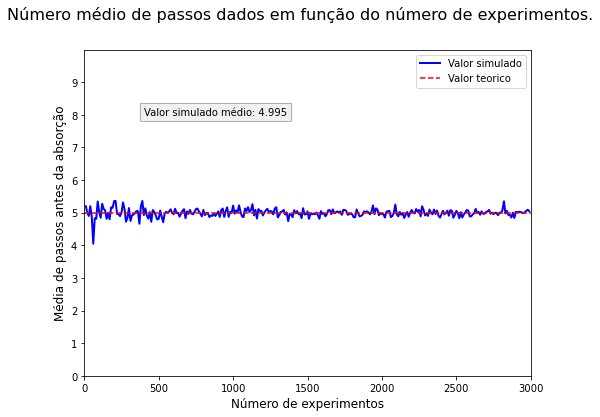

In [15]:
plt.figure(figsize = (8,6))
plt.plot(ret2['vsim'],ret2['vsteps'], linestyle = '-', color='blue', linewidth =2, label = 'Valor simulado')
plt.axhline(y=5, color='r', linestyle ='--', label = 'Valor teorico')
plt.ylabel("Média de passos antes da absorção", fontsize=12)
plt.xlabel("Número de experimentos", fontsize = 12)
plt.suptitle("Número médio de passos dados em função do número de experimentos.", fontsize = 16)
plt.xlim(0.0,Nmax)
plt.ylim(0.0,10)
plt.text(400,8,"Valor simulado médio: "+"{:.3f}".format(np.mean(ret2['vsteps'])), bbox=dict(facecolor='lightgrey', alpha=0.3))
plt.legend()
locs, labels = plt.yticks()  # Get the current locations and labels.
plt.yticks(np.arange(0, 10, step=1))  # Set label locations.


plt.show(True)

## Sem a aranha:
Considerando que a aranha não está no estado 3, ficamos com uma nova matriz markoviana, dada por:


$$
\begin{equation}
    \label{matriz4}
    \begin{bmatrix}
        0.333 & 0.333 & 0 & 0.333 & 0\\
        0.333 & 0.333 & 0.333 & 0 & 0\\
        0 & 0.333 & 0.333 & 0.333 & 0\\
        0.25 & 0 & 0.25 & 0.25 & 0.25\\
        0 & 0 & 0 & 0 & 1
    \end{bmatrix}
\end{equation}
$$

Refazendo a simulação para esta nova matriz, olhando o número de passos dados, temos:

In [16]:
p = np.array([[1/3, 1/3, 0,   1/3, 0],
              [1/3, 1/3, 1/3, 0,   0],
              [0,   1/3, 1/3, 1/3, 0],
              [1/4, 0,   1/4, 1/4, 1/4],
              [0,   0,   0,   0,   1]])

ret3 = simula(p,Nmax)

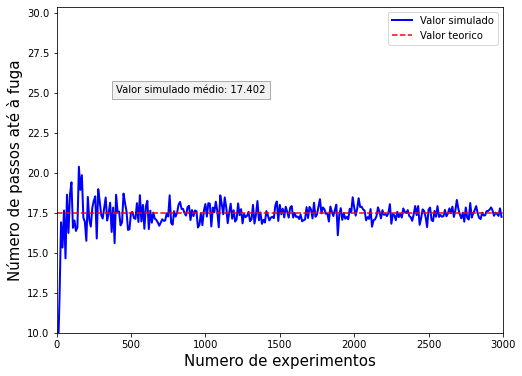

In [17]:

plt.figure(figsize = (8,6))
plt.plot(ret3['vsim'],ret3['vsteps'], linestyle = '-', color='blue', linewidth =2, label = 'Valor simulado')
plt.axhline(y=17.5, color='r', linestyle ='--', label = 'Valor teorico')
plt.ylabel("Número de passos até à fuga", fontsize=15)
plt.xlabel("Numero de experimentos", fontsize = 15)
plt.text(400,25,"Valor simulado médio: "+"{:.3f}".format(np.mean(ret3['vsteps'])), bbox=dict(facecolor='lightgrey', alpha=0.3))
plt.xlim(0.0,Nmax)
plt.ylim(10,np.amax(ret3['vsteps']) + 10)
plt.legend()
plt.show(True)


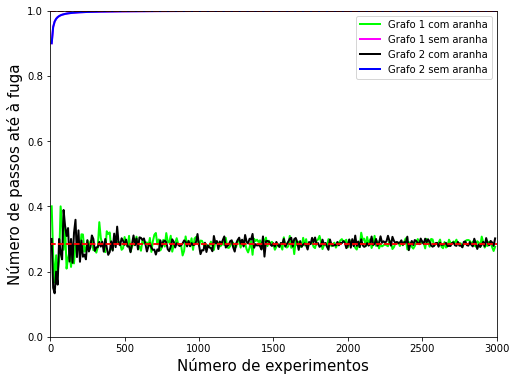

In [18]:
plt.figure(figsize = (8,6))
plt.plot(ret['vsim'],ret['vp'], linestyle = '-', color='lime', linewidth =2, label = 'Grafo 1 com aranha')
plt.plot(ret1['vsim'],ret1['vp'], linestyle = '-', color='magenta', linewidth =2, label = 'Grafo 1 sem aranha')
plt.plot(ret2['vsim'],ret2['vp'], linestyle = '-', color='black', linewidth =2, label = 'Grafo 2 com aranha')
plt.plot(ret3['vsim'],ret3['vp'], linestyle = '-', color='blue', linewidth =2, label = 'Grafo 2 sem aranha')
plt.axhline(y=np.mean(ret['vp']), color='r', linestyle ='--')
plt.axhline(y=np.mean(ret1['vp']), color='r', linestyle ='--')
plt.axhline(y=np.mean(ret2['vp']), color='r', linestyle ='--')
plt.axhline(y=np.mean(ret3['vp']), color='r', linestyle ='--')
plt.ylabel("Número de passos até à fuga", fontsize=15)
plt.xlabel("Número de experimentos", fontsize = 15)
plt.xlim(0.0,Nmax)
plt.ylim(0,1)
plt.legend()
plt.show(True)

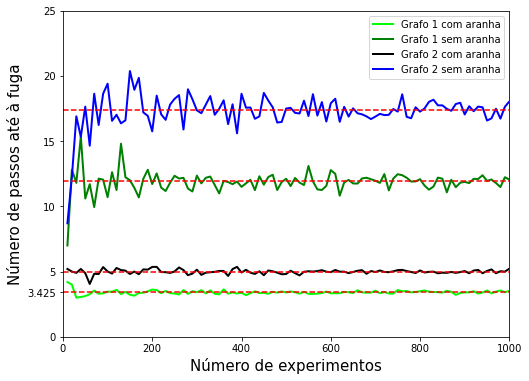

In [43]:
plt.figure(figsize = (8,6))
plt.plot(ret['vsim'],ret['vsteps'], linestyle = '-', color='lime', linewidth =2, label = 'Grafo 1 com aranha')
plt.plot(ret1['vsim'],ret1['vsteps'], linestyle = '-', color='green', linewidth =2, label = 'Grafo 1 sem aranha')
plt.plot(ret2['vsim'],ret2['vsteps'], linestyle = '-', color='black', linewidth =2, label = 'Grafo 2 com aranha')
plt.plot(ret3['vsim'],ret3['vsteps'], linestyle = '-', color='blue', linewidth =2, label = 'Grafo 2 sem aranha')
plt.axhline(y=np.mean(ret['vsteps']), color='r', linestyle ='--')
plt.axhline(y=np.mean(ret1['vsteps']), color='r', linestyle ='--')
plt.axhline(y=np.mean(ret2['vsteps']), color='r', linestyle ='--')
plt.axhline(y=np.mean(ret3['vsteps']), color='r', linestyle ='--')
plt.ylabel("Número de passos até à fuga", fontsize=15)
plt.xlabel("Número de experimentos", fontsize = 15)
plt.xlim(0.0,Nmax)
plt.ylim(0,25)
plt.legend()
plt.yticks(np.append(np.arange(0,30,5),np.mean(ret['vsteps'])),np.append(np.arange(0,30,5),"{:.3f}".format(np.mean(ret['vsteps']))))
plt.show(True)

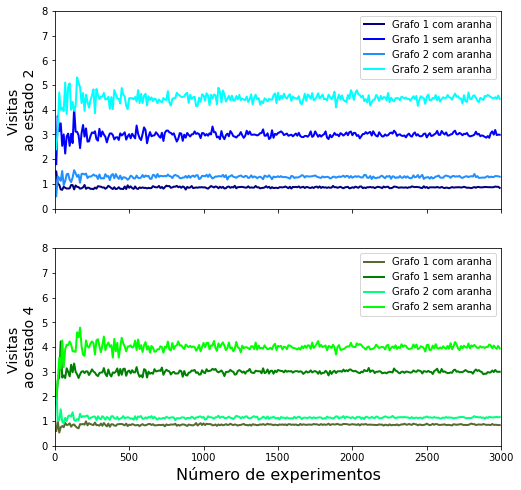

In [20]:
fig, axs = plt.subplots(2, sharex=True,figsize=(8, 8))
#fig.suptitle('Número médio de visitas ao estado 2 e 4', fontsize = 15)

axs[0].plot(ret['vsim'],ret['vdois'], linestyle = '-', color='navy', linewidth =2, label = 'Grafo 1 com aranha')
axs[0].plot(ret1['vsim'],ret1['vdois'], linestyle = '-', color='blue', linewidth =2, label = 'Grafo 1 sem aranha')
axs[0].plot(ret2['vsim'],ret2['vdois'], linestyle = '-', color='dodgerblue', linewidth =2, label = 'Grafo 2 com aranha')
axs[0].plot(ret3['vsim'],ret3['vdois'], linestyle = '-', color='aqua', linewidth =2, label = 'Grafo 2 sem aranha')

axs[1].plot(ret['vsim'],ret['vquatro'], linestyle = '-', color='darkolivegreen', linewidth =2, label = 'Grafo 1 com aranha')
axs[1].plot(ret1['vsim'],ret1['vquatro'], linestyle = '-', color='green', linewidth =2, label = 'Grafo 1 sem aranha')
axs[1].plot(ret2['vsim'],ret2['vquatro'], linestyle = '-', color='springgreen', linewidth =2, label = 'Grafo 2 com aranha')
axs[1].plot(ret3['vsim'],ret3['vquatro'], linestyle = '-', color='lime', linewidth =2, label = 'Grafo 2 sem aranha')



states = [2,4]
c = 0
for ax in axs.flat:
    ax.set(ylabel=f"Visitas \nao estado {states[c]}",xlabel="Número de experimentos", xlim = (0.0,Nmax),ylim=(0.0,8))
    ax.legend()
    c = c +1
    ax.yaxis.label.set(fontsize=14)
    ax.xaxis.label.set(fontsize=16)
    

for ax in axs.flat:
    ax.label_outer()


plt.show(True)

In [21]:
p = np.array([[1/3,1/3,0,1/3,0],
              [1/3,1/3,1/3,0,0],
              [0,0,1,0,0],
              [1/4,0,1/4,1/4,1/4],
              [0,0,0,0,1]])
'''p = np.array([[1/3,1/3,0,1/3,0],
              [1/3,1/3,1/3,0,0],
              [0,1/3,1/3,1/3,0],
              [1/4,0,1/4,1/4,1/4],
              [0,0,0,0,1]])'''
'''
p = np.array([[0,1/2,0,1/2,0],
              [1/2,0,1/2,0,0],
              [0,0,1,0,0],
              [1/3,0,1/3,0,1/3],
              [0,0,0,0,1]])
'''

captura = np.arange(0,1.1,0.1)


vcap = []
vmean = []
Nmax = 1000 # número máximo de simulações

for cap in captura:
    p = np.array([[1/3,1/3,0,1/3,0],
              [1/3,1/3,1/3,0,0],
              [0,1/3,1/3,1/3,0],
              [1/4,0,1/4,1/4,1/4],
              [0,0,0,0,1]])
    vp = [] # lista que armazena a fração de ocorrências em função do número de simulações nsim
    vsim = [] # numero de simulações
    vsteps = []
    for nsim in np.arange(10, Nmax, 10):
        ok = 0
        for i in range(1,nsim):
            state = 0
            step = 0
            morta = 0
            while(True):
                if state == 2 and np.random.uniform() < cap:
                    break
                elif state == 4:
                    ok = ok + 1
                    break
                else:
                    state = caminha(state, p)
                    step = step + 1
        vp.append(ok/nsim)
        vsim.append(nsim)
        vsteps.append(step)  
    vcap.append(cap)
    vmean.append(np.mean(vp))

[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]
[0.994770325739758, 0.7338026739788295, 0.5919792879117997, 0.5115287178325308, 0.44512103546660226, 0.39511829686792665, 0.36764188346336596, 0.3370696763127415, 0.31569391865663876, 0.2920367284750827, 0.28595966456727023]


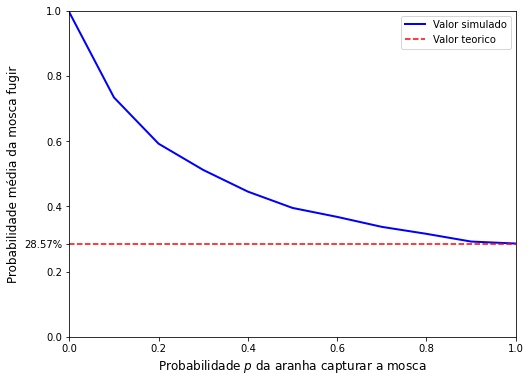

In [22]:
print(vcap)
print(vmean)
plt.figure(figsize = (8,6))
plt.plot(vcap,vmean, linestyle = '-', color='blue', linewidth =2, label = 'Valor simulado')
plt.axhline(y=2/7, color='r', linestyle ='--', label = 'Valor teorico')
plt.ylabel("Probabilidade média da mosca fugir", fontsize=12)
plt.xlabel("Probabilidade $p$ da aranha capturar a mosca", fontsize = 12)
#plt.suptitle("Probabilidade de fuga obtida em função do número de experimentos.", fontsize = 16)
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
#plt.text(400,0.6,"Valor simulado médio: "+"{:.3%}".format(np.mean(vp)), bbox=dict(facecolor='lightgrey', alpha=0.3))
plt.legend()

locs, labels = plt.yticks()  # Get the current locations and labels.
plt.yticks(np.arange(0, 1, step=0.2))  # Set label locations.
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0,2/7],[0.0,0.2,0.4,0.6,0.8,1.0,"{:.2%}".format(2/7)])


plt.show(True)
